<a href="https://colab.research.google.com/github/Mehdi-derafshi/Clssification-MNIST/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

x , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [4]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is a little hard to undersatant right now... let's visiulize

In [6]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], 'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


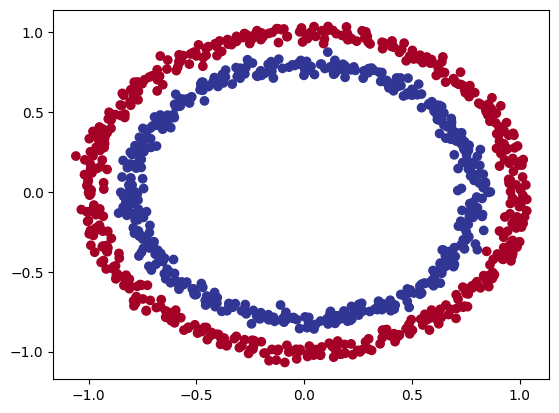

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
x.shape, y.shape

((1000, 2), (1000,))

In [9]:
import tensorflow as tf
import numpy as np

In [10]:
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [11]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(x, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 4.3242 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.1740 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7314 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5070


The accuracy is ~50%.

let"s improve it


In [12]:
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4420


[0.6932239532470703, 0.44200000166893005]

In [13]:
# Let's add an extra layer

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(x, y, epochs=100, verbose=0)

In [14]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936006546020508, 0.5]

### Improving our model

In [15]:
   model_3 = tf.keras.Sequential([
       tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(10),
       tf.keras.layers.Dense(1)
   ])

   model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

model_3.fit(x, y, epochs=100, verbose=0)
model_3.evaluate(x, y)



32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5120


[0.6960434317588806, 0.5120000243186951]

to visualize our model's predictions, lt's create a function "plot_decision_boundry()", this function will:

*Take in a trained model, features(x) and labels(y)

*Create a meshgrid of the different x values


*Make predictions across the meshgrid

*plot the predictions as well as a line between zones (where each unique class falls)


In [16]:
def plot_decision_boundary(model, x, y):
  """ I inspired this function by
  https://cs231n.github.io/
  """


  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))


  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")

    y_pred =   np.round(y_pred).reshape(xx.shape)


    # plot the dicision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


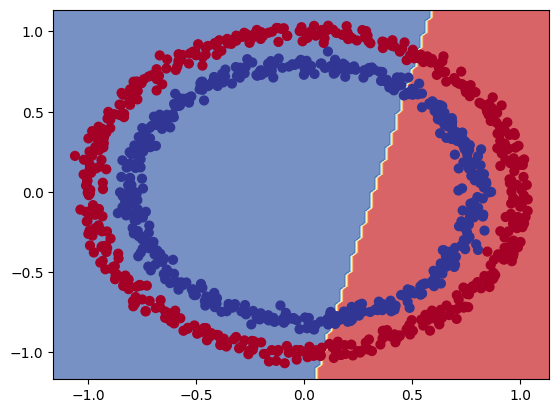

In [17]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

It seems our model is not suitable for non_linearity

In [18]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])


model_4.fit(x, y, epochs=300)

Epoch 1/300
32/32 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5020
Epoch 2/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5090
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5290
Epoch 4/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5380
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5440
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5440
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5450
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5460
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5420
Epoch 10/300
32/32 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5420
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


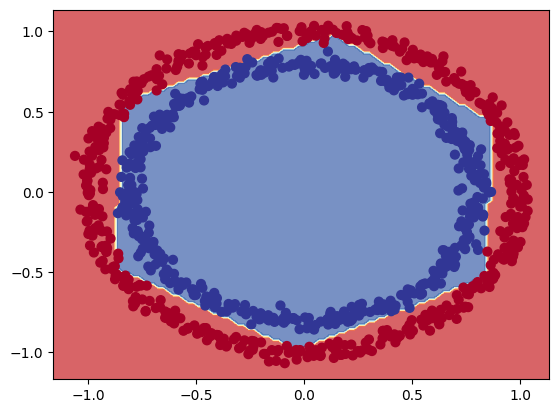

In [19]:
plot_decision_boundary(model_4, x, y)

### Evaluating and improving our classification

so far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [20]:
len(x)

1000

In [21]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [22]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


model_5.fit(x_train, y_train, epochs=100)



Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.4963
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5038
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5138
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5100
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5400
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5487
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5512
Epoch 11/

In [23]:
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 1.0000


[0.06472838670015335, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


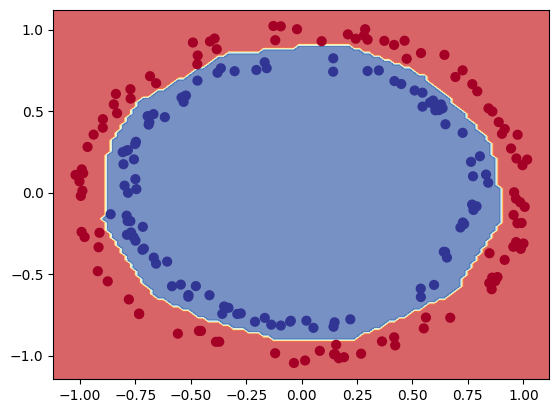

In [24]:
plot_decision_boundary(model_5, x_test, y_test)

# More classification evaluation method
* Confusion matrix

In [25]:
# check the accuracy of our model
loss, accuracy = model_5.evaluate(x_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 1.0000
Model loss on the test set: 0.06472838670015335
Model accuracy on the test set: 100.00%


In [26]:
# Let's create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_5.predict(x_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [27]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])